# Data Analysis

This code is specically desgined to visualize the data and understand how is distributed across all variables

## Libraries import

In [34]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Global variables

In [3]:
PATH_DENSITY_REPORT       = 'density_report.csv'
PATH_HISTORICAL_INCIDENTS = 'historical_incidents.csv'
PATH_PRODUCT_ATTRIBUTES   = 'product_attributes.csv'
PATH_SUPPLIER_SCORECARD   = 'supplier_scorecard.csv'

## Execution

### 1. Read files

In [4]:
# Reading csv files
df_density_report = pl.read_csv(PATH_DENSITY_REPORT, separator=";")
df_historical_incidents = pl.read_csv(PATH_HISTORICAL_INCIDENTS, separator=";")
df_product_attributes = pl.read_csv(PATH_PRODUCT_ATTRIBUTES, separator=";")
df_supplier_scorecard = pl.read_csv(PATH_SUPPLIER_SCORECARD, separator=";")

# Adjusting date values
df_density_report = df_density_report.with_columns([
    pl.col("DateOfReport").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

df_historical_incidents = df_historical_incidents.with_columns([
    pl.col("DateOfIncident").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

df_supplier_scorecard = df_supplier_scorecard.with_columns([
    pl.col("ReportDate").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

<ipython-input-4-ae74af504b34>:9: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("DateOfReport").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
<ipython-input-4-ae74af504b34>:13: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("DateOfIncident").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
<ipython-input-4-ae74af504b34>:17: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/str

### 2. Density report

#### 2.1 Data preview

In [6]:
df_density_report.head(10)

ReportID,SupplierName,DateOfReport,GarmentType,Material,ProductReference,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
i64,str,date,str,str,str,i64,str,str,str
1,"""SupplierB""",2023-09-27,"""Dress""","""Cotton""","""DRE-COT-1992""",7,"""Method1""","""LayoutA""","""Good"""
2,"""SupplierB""",2024-05-30,"""Coat""","""Polyester""","""COA-POL-8528""",12,"""Method2""","""LayoutB""","""Bad"""
3,"""SupplierC""",2023-07-25,"""Sweater""","""Wool""","""SWE-WOO-2045""",14,"""Method1""","""LayoutD""","""Bad"""
4,"""SupplierC""",2023-06-16,"""Dress""","""Polyester""","""DRE-POL-3008""",17,"""Method1""","""LayoutE""","""Good"""
5,"""SupplierA""",2024-06-07,"""Shirt""","""Polyester""","""SHI-POL-5449""",20,"""Method2""","""LayoutB""","""Good"""
6,"""SupplierA""",2023-04-28,"""Jacket""","""Polyester""","""JAC-POL-4551""",5,"""Method1""","""LayoutE""","""Bad"""
7,"""SupplierB""",2023-08-11,"""Skirt""","""Wool""","""SKI-WOO-6663""",null,"""Method1""","""LayoutC""","""Good"""
8,"""SupplierC""",2023-07-06,"""Jacket""","""Polyester""","""JAC-POL-3243""",12,"""Method2""","""LayoutD""","""Good"""
9,"""SupplierB""",2024-03-12,"""Suit""","""Cotton""","""SUI-COT-3333""",17,"""Method3""","""LayoutB""","""Good"""


#### 2.2 Data basic summary

In [10]:
df_density_report.describe()

statistic,ReportID,SupplierName,DateOfReport,GarmentType,Material,ProductReference,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
str,f64,str,str,str,str,str,f64,str,str,str
"""count""",500000.0,"""500000""","""500000""","""500000""","""500000""","""489923""",470041.0,"""484996""","""490047""","""500000"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""10077""",29959.0,"""15004""","""9953""","""0"""
"""mean""",250000.5,null,"""2023-09-30 16:10:08.025000""",null,null,null,12.484502,null,null,null
"""std""",144337.711635,null,null,null,null,null,4.616234,null,null,null
"""min""",1.0,"""SupplierA""","""2023-01-01""","""Coat""","""Cotton""","""COA-COT-1000""",5.0,"""Method1""","""LayoutA""","""Bad"""
"""25%""",125001.0,null,"""2023-05-17""",null,null,null,8.0,null,null,null
"""50%""",250001.0,null,"""2023-10-01""",null,null,null,12.0,null,null,null
"""75%""",375000.0,null,"""2024-02-15""",null,null,null,16.0,null,null,null
"""max""",500000.0,"""SupplierC""","""2024-06-30""","""Sweater""","""Wool""","""SWE-WOO-9999""",20.0,"""Method3""","""LayoutE""","""Good"""


#### 2.3 Suppliers distribution

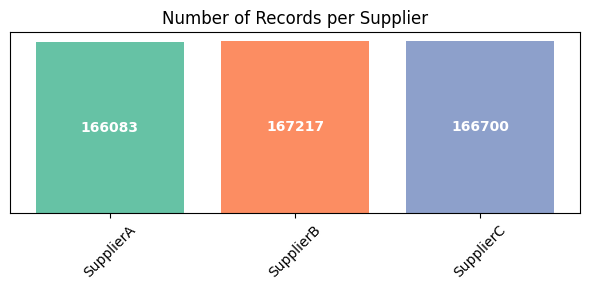

In [16]:
# Group and sort alphabetically
df_counts = df_density_report.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_pd = df_counts.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_pd["SupplierName"], df_counts_pd["NumRecords"], color=colors[:len(df_counts_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 2.4 Suppliers distribution over the time

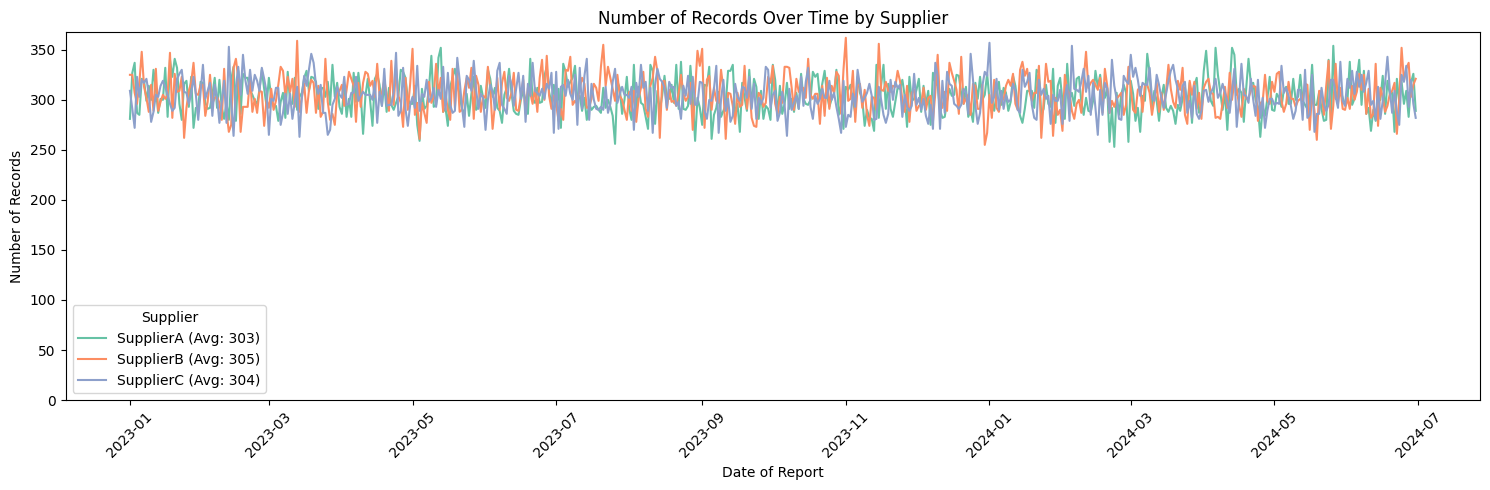

In [20]:
# Group by Date and Supplier, count
df_time_counts = df_density_report.group_by(["DateOfReport", "SupplierName"]).agg([
    pl.len().alias("NumRecords")
])

# Convert to pandas and pivot
df_time_pd = df_time_counts.to_pandas()
df_time_pivot = df_time_pd.pivot_table(index="DateOfReport", columns="SupplierName", values="NumRecords", fill_value=0)

# Sort by date
df_time_pivot = df_time_pivot.sort_index()

# Use same colors as before
supplier_names = df_time_pivot.columns.tolist()
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(supplier_names)}

# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot[supplier].mean()
    label = f"{supplier} (Avg: {int(avg)})"
    plt.plot(df_time_pivot.index, df_time_pivot[supplier], label=label, color=color_map[supplier])

# Final touches
plt.title("Number of Records Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Number of Records")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### 2.5 Garment distribution per supplier

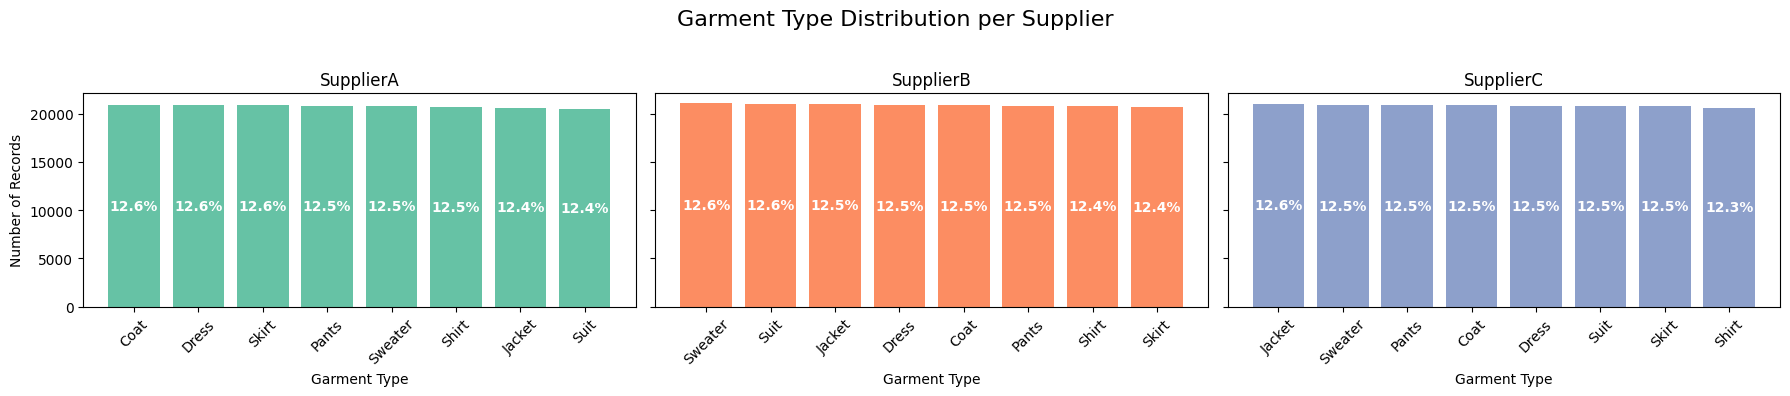

In [25]:
# Group by Supplier + GarmentType and count
df_garments = df_density_report.group_by(["SupplierName", "GarmentType"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(6 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["GarmentType"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Garment Type Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Material distribution per supplier

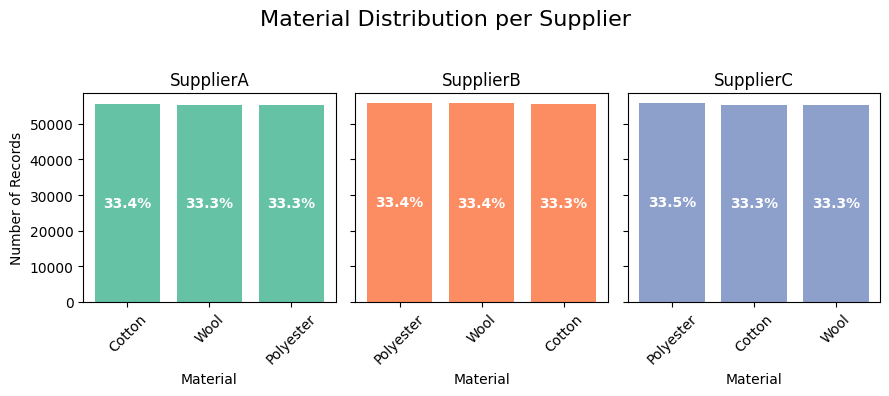

In [30]:
# Group by Supplier + Material and count
df_materials = df_density_report.group_by(["SupplierName", "Material"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier
total_counts = df_materials.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Compute percentages
df_materials["Percentage"] = df_materials.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Step 4: Prepare subplots
suppliers = sorted(df_materials["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_materials[df_materials["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["Material"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Material")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final layout
plt.suptitle("Material Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Units proposed per garment

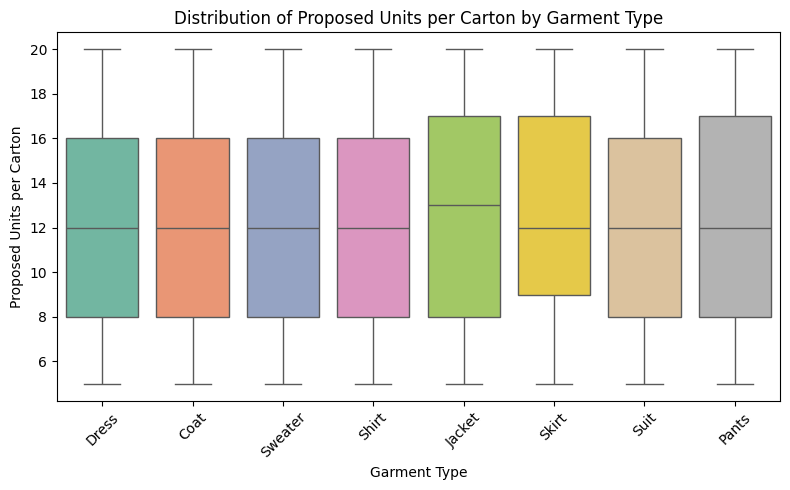

In [40]:
# Convert to pandas
df_box = df_density_report.select(["GarmentType", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="GarmentType",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="GarmentType",
    palette="Set2",
    legend=False
)

plt.title("Distribution of Proposed Units per Carton by Garment Type")
plt.xlabel("Garment Type")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.7 Units proposed per folding method

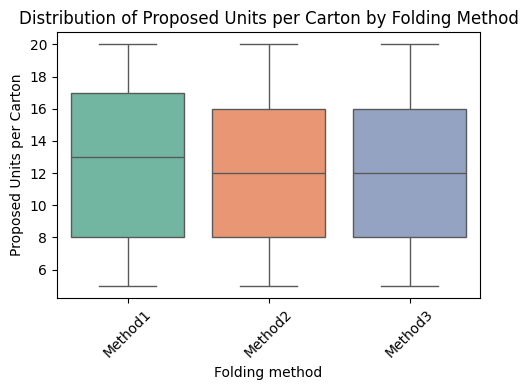

In [39]:
# Convert to pandas
df_box = df_density_report.select(["ProposedFoldingMethod", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(
    x="ProposedFoldingMethod",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="ProposedFoldingMethod",
    palette="Set2",
    legend=False
)

plt.title("Distribution of Proposed Units per Carton by Folding Method")
plt.xlabel("Folding method")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.8 Units proposed per layout

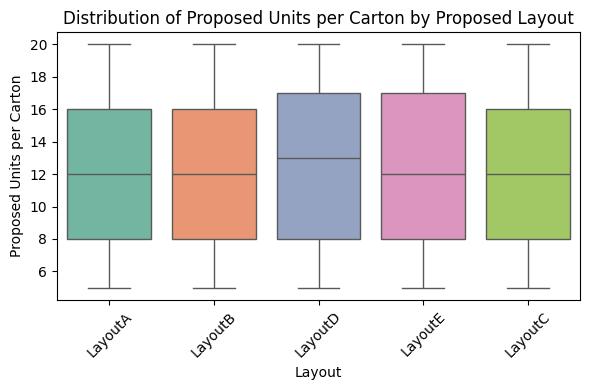

In [42]:
# Convert to pandas
df_box = df_density_report.select(["ProposedLayout", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="ProposedLayout",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="ProposedLayout",
    palette="Set2",
    legend=False
)

plt.title("Distribution of Proposed Units per Carton by Proposed Layout")
plt.xlabel("Layout")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.9 Packing quality per supplier

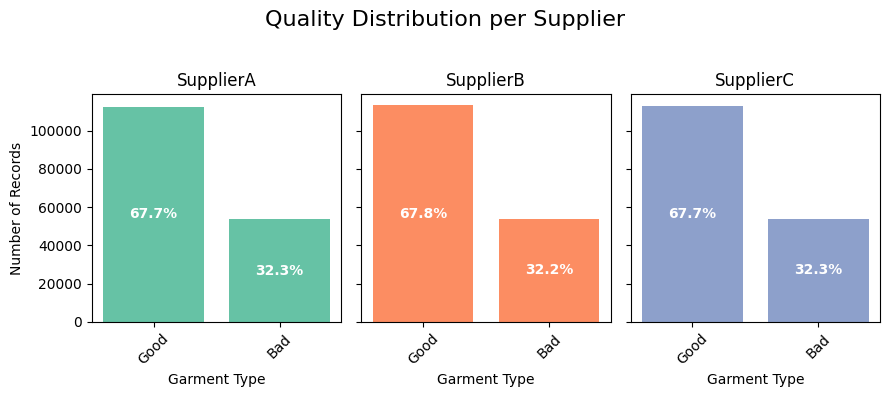

In [45]:
# Group by Supplier + PackagingQuality and count
df_garments = df_density_report.group_by(["SupplierName", "PackagingQuality"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["PackagingQuality"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Quality Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()